In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

import plotly.graph_objects as go
from shapely.geometry import Point


In [57]:
path = "D:/Allaus/Code/cont10_pez_sin.csv"
df = pd.read_csv(path)
df

,fid,ELEV,x_cont,y_cont,CODI_DEL_L,x,y,area_calc,Xcode_cont,Ycode_cont
0,1,2680.0,535422.897,39859.221,RB12,535464.456,39465.413,239692.760,535422.897,39859.221
1,2,2670.0,535296.147,39793.574,RB11,535190.276,39340.986,235475.888,535158.062,39742.372
2,2,2670.0,535296.147,39793.574,RB12,535464.456,39465.413,239692.760,535311.136,39799.132
3,3,2670.0,535117.188,39730.312,RB11,535190.276,39340.986,235475.888,535117.188,39730.312
4,4,2670.0,535082.938,39716.556,RB11,535190.276,39340.986,235475.888,535082.938,39716.556
...,...,...,...,...,...,...,...,...,...,...
18830,4388,1800.0,534816.873,27688.166,SO03,529072.632,23460.373,331772.003,529146.444,23280.645
18831,4388,1800.0,534816.873,27688.166,SO06,529086.793,22885.232,103183.102,528837.435,22970.926
18832,4388,1800.0,534816.873,27688.166,SO08,529033.182,22619.882,179765.963,529015.516,22673.781
18833,4388,1800.0,534816.873,27688.166,CA10-A,NaN,NaN,133557.319,536418.226,29323.421


In [58]:
df1 = df.copy()

In [59]:
df1.shape

(18835, 10)

In [60]:
df1.dtypes

fid             int64
ELEV          float64
x_cont        float64
y_cont        float64
CODI_DEL_L     object
x             float64
y             float64
area_calc     float64
Xcode_cont    float64
Ycode_cont    float64
dtype: object

In [61]:
df1.columns

Index(['fid', 'ELEV', 'x_cont', 'y_cont', 'CODI_DEL_L', 'x', 'y', 'area_calc',
       'Xcode_cont', 'Ycode_cont'],
      dtype='object')

In [62]:
df1 = df1.drop(columns=['fid', 'x_cont', 'y_cont', 'x', 'y'])
df1

,ELEV,CODI_DEL_L,area_calc,Xcode_cont,Ycode_cont
0,2680.0,RB12,239692.760,535422.897,39859.221
1,2670.0,RB11,235475.888,535158.062,39742.372
2,2670.0,RB12,239692.760,535311.136,39799.132
3,2670.0,RB11,235475.888,535117.188,39730.312
4,2670.0,RB11,235475.888,535082.938,39716.556
...,...,...,...,...,...
18830,1800.0,SO03,331772.003,529146.444,23280.645
18831,1800.0,SO06,103183.102,528837.435,22970.926
18832,1800.0,SO08,179765.963,529015.516,22673.781
18833,1800.0,CA10-A,133557.319,536418.226,29323.421


In [63]:
df1 = df1.rename(columns = {'ELEV': 'elevation', 'CODI_DEL_L': 'code', 'area_calc': 'area', 
                            'Xcode_cont': 'x', 'Ycode_cont': 'y'})
# the statistics of elev (e.g. count, mean min, etc.) were acquired from Zonal Statistics in QGIS 
# from the avalanche polygons to the DEM
df1

,elevation,code,area,x,y
0,2680.0,RB12,239692.760,535422.897,39859.221
1,2670.0,RB11,235475.888,535158.062,39742.372
2,2670.0,RB12,239692.760,535311.136,39799.132
3,2670.0,RB11,235475.888,535117.188,39730.312
4,2670.0,RB11,235475.888,535082.938,39716.556
...,...,...,...,...,...
18830,1800.0,SO03,331772.003,529146.444,23280.645
18831,1800.0,SO06,103183.102,528837.435,22970.926
18832,1800.0,SO08,179765.963,529015.516,22673.781
18833,1800.0,CA10-A,133557.319,536418.226,29323.421


In [64]:
df1.describe()

,elevation,area,x,y
count,18835.000000,18835.000000,18835.000000,18835.000000
mean,2157.572604,103759.150424,539304.856309,26638.781320
std,385.078185,115993.318961,6539.902147,6003.721179
min,970.000000,1118.293000,523843.133000,14870.477000
25%,1870.000000,33471.879000,534662.841000,21768.973000
50%,2210.000000,64745.926000,538081.668000,24773.121000
75%,2470.000000,120968.527000,544857.190500,31541.774000
max,2930.000000,788938.231000,554264.838000,39859.221000


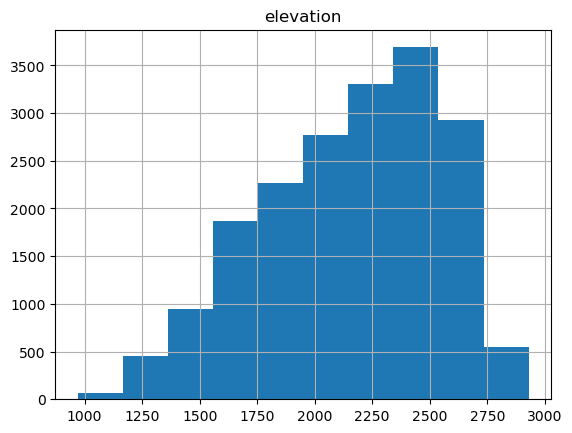

In [65]:
df1.hist(column='elevation')
plt.show()

In [66]:
code_names = list(df1['code'].unique())   
len(code_names)  

607

In [68]:
# see = df1[~df1.code.isin(code_names)]
# see

,elevation,code,area,x,y


In [69]:
quantiles = pd.DataFrame(df1.groupby(['code'])['elevation'].quantile(q=0.80)).reset_index()
quantiles

,code,elevation
0,AA01,1510.0
1,AA02,1790.0
2,AA03,1602.0
3,AA04,1534.0
4,AA05,1368.0
...,...,...
602,VC02,2644.0
603,VR05,2800.0
604,VR06,2750.0
605,VR07,2736.0


In [70]:
quantiles = quantiles.rename(columns = {'elevation': 'quant80'})
quantiles

,code,quant80
0,AA01,1510.0
1,AA02,1790.0
2,AA03,1602.0
3,AA04,1534.0
4,AA05,1368.0
...,...,...
602,VC02,2644.0
603,VR05,2800.0
604,VR06,2750.0
605,VR07,2736.0


In [71]:
ascend = df1.sort_values(by='code', ignore_index=True)
ascend

,elevation,code,area,x,y
0,1310.0,AA01,10222.063,535125.948,24330.579
1,1300.0,AA01,10222.063,535124.803,24320.735
2,1240.0,AA01,10222.063,535097.726,24217.065
3,1560.0,AA01,10222.063,535158.622,24617.807
4,1250.0,AA01,10222.063,535104.976,24232.512
...,...,...,...,...,...
18830,2090.0,VT05,24061.669,531854.625,36852.257
18831,2030.0,VT05,24061.669,531875.828,36947.682
18832,1930.0,VT05,24061.669,531995.076,37105.635
18833,2040.0,VT05,24061.669,531870.333,36933.661


In [72]:
tot = pd.merge(ascend, quantiles, how='outer', on='code')
tot

,elevation,code,area,x,y,quant80
0,1310.0,AA01,10222.063,535125.948,24330.579,1510.0
1,1300.0,AA01,10222.063,535124.803,24320.735,1510.0
2,1240.0,AA01,10222.063,535097.726,24217.065,1510.0
3,1560.0,AA01,10222.063,535158.622,24617.807,1510.0
4,1250.0,AA01,10222.063,535104.976,24232.512,1510.0
...,...,...,...,...,...,...
18830,2090.0,VT05,24061.669,531854.625,36852.257,2062.0
18831,2030.0,VT05,24061.669,531875.828,36947.682,2062.0
18832,1930.0,VT05,24061.669,531995.076,37105.635,2062.0
18833,2040.0,VT05,24061.669,531870.333,36933.661,2062.0


In [73]:
tot.loc[tot['elevation'] >= tot['quant80'], 'keepornot'] = 1
tot.loc[tot['elevation'] < tot['quant80'], 'keepornot'] = 0
tot

,elevation,code,area,x,y,quant80,keepornot
0,1310.0,AA01,10222.063,535125.948,24330.579,1510.0,0.0
1,1300.0,AA01,10222.063,535124.803,24320.735,1510.0,0.0
2,1240.0,AA01,10222.063,535097.726,24217.065,1510.0,0.0
3,1560.0,AA01,10222.063,535158.622,24617.807,1510.0,1.0
4,1250.0,AA01,10222.063,535104.976,24232.512,1510.0,0.0
...,...,...,...,...,...,...,...
18830,2090.0,VT05,24061.669,531854.625,36852.257,2062.0,1.0
18831,2030.0,VT05,24061.669,531875.828,36947.682,2062.0,0.0
18832,1930.0,VT05,24061.669,531995.076,37105.635,2062.0,0.0
18833,2040.0,VT05,24061.669,531870.333,36933.661,2062.0,0.0


In [74]:
new = tot.loc[tot['keepornot'] == 1]
new

,elevation,code,area,x,y,quant80,keepornot
3,1560.0,AA01,10222.063,535158.622,24617.807,1510.0,1.0
14,1540.0,AA01,10222.063,535158.734,24594.764,1510.0,1.0
20,1580.0,AA01,10222.063,535151.996,24640.568,1510.0,1.0
22,1510.0,AA01,10222.063,535153.995,24560.446,1510.0,1.0
27,1550.0,AA01,10222.063,535160.708,24607.055,1510.0,1.0
...,...,...,...,...,...,...,...
18813,2740.0,VR07,372869.294,540234.637,34888.685,2736.0,1.0
18818,2100.0,VT05,24061.669,531853.136,36837.034,2062.0,1.0
18827,2080.0,VT05,24061.669,531853.529,36872.332,2062.0,1.0
18830,2090.0,VT05,24061.669,531854.625,36852.257,2062.0,1.0


In [75]:
print(len(list(new['code'].unique())))     # perfection

607


In [76]:
last = pd.DataFrame(new.groupby(['code'])['elevation'].min()).reset_index()
last

,code,elevation
0,AA01,1510.0
1,AA02,1790.0
2,AA03,1610.0
3,AA04,1540.0
4,AA05,1370.0
...,...,...
602,VC02,2650.0
603,VR05,2800.0
604,VR06,2750.0
605,VR07,2740.0


In [77]:
last.rename(columns={'elevation': 'elevation_min'}, inplace=True)
last

,code,elevation_min
0,AA01,1510.0
1,AA02,1790.0
2,AA03,1610.0
3,AA04,1540.0
4,AA05,1370.0
...,...,...
602,VC02,2650.0
603,VR05,2800.0
604,VR06,2750.0
605,VR07,2740.0


In [78]:
tot2 = pd.merge(new, last, how='outer', on='code')
tot2

,elevation,code,area,x,y,quant80,keepornot,elevation_min
0,1560.0,AA01,10222.063,535158.622,24617.807,1510.0,1.0,1510.0
1,1540.0,AA01,10222.063,535158.734,24594.764,1510.0,1.0,1510.0
2,1580.0,AA01,10222.063,535151.996,24640.568,1510.0,1.0,1510.0
3,1510.0,AA01,10222.063,535153.995,24560.446,1510.0,1.0,1510.0
4,1550.0,AA01,10222.063,535160.708,24607.055,1510.0,1.0,1510.0
...,...,...,...,...,...,...,...,...
4011,2740.0,VR07,372869.294,540234.637,34888.685,2736.0,1.0,2740.0
4012,2100.0,VT05,24061.669,531853.136,36837.034,2062.0,1.0,2070.0
4013,2080.0,VT05,24061.669,531853.529,36872.332,2062.0,1.0,2070.0
4014,2090.0,VT05,24061.669,531854.625,36852.257,2062.0,1.0,2070.0


In [79]:
tot2.loc[tot2['elevation'] == tot2['elevation_min'], 'onezero'] = 1
tot2.loc[tot2['elevation'] != tot2['elevation_min'], 'onezero'] = 0
tot2

,elevation,code,area,x,y,quant80,keepornot,elevation_min,onezero
0,1560.0,AA01,10222.063,535158.622,24617.807,1510.0,1.0,1510.0,0.0
1,1540.0,AA01,10222.063,535158.734,24594.764,1510.0,1.0,1510.0,0.0
2,1580.0,AA01,10222.063,535151.996,24640.568,1510.0,1.0,1510.0,0.0
3,1510.0,AA01,10222.063,535153.995,24560.446,1510.0,1.0,1510.0,1.0
4,1550.0,AA01,10222.063,535160.708,24607.055,1510.0,1.0,1510.0,0.0
...,...,...,...,...,...,...,...,...,...
4011,2740.0,VR07,372869.294,540234.637,34888.685,2736.0,1.0,2740.0,1.0
4012,2100.0,VT05,24061.669,531853.136,36837.034,2062.0,1.0,2070.0,0.0
4013,2080.0,VT05,24061.669,531853.529,36872.332,2062.0,1.0,2070.0,0.0
4014,2090.0,VT05,24061.669,531854.625,36852.257,2062.0,1.0,2070.0,0.0


In [80]:
new2 = tot2.loc[tot2['onezero'] == 1]  # length > unique values, because of repeated intersections of contours in one polygon
new2


,elevation,code,area,x,y,quant80,keepornot,elevation_min,onezero
3,1510.0,AA01,10222.063,535153.995,24560.446,1510.0,1.0,1510.0,1.0
11,1790.0,AA02,35655.702,534901.989,25221.534,1790.0,1.0,1790.0,1.0
12,1610.0,AA03,1118.293,534122.737,25057.604,1602.0,1.0,1610.0,1.0
20,1540.0,AA04,43472.477,533886.388,25025.859,1534.0,1.0,1540.0,1.0
28,1370.0,AA05,19541.419,533584.873,24883.942,1368.0,1.0,1370.0,1.0
...,...,...,...,...,...,...,...,...,...
3992,2650.0,VC02,28529.392,545037.850,22352.118,2644.0,1.0,2650.0,1.0
3998,2800.0,VR05,143713.599,539079.641,34687.550,2800.0,1.0,2800.0,1.0
4002,2750.0,VR06,83766.834,539509.119,34878.527,2750.0,1.0,2750.0,1.0
4011,2740.0,VR07,372869.294,540234.637,34888.685,2736.0,1.0,2740.0,1.0


In [81]:
print(len(list(new2['code'].unique())))   # good

607


In [82]:
duplicateRows = new2[new2.duplicated(['code'])]

In [83]:
print(duplicateRows)

      elevation  code        area           x          y  quant80  keepornot  \
317      2600.0  CL01   47108.879  542415.851  23558.475   2600.0        1.0   
318      2600.0  CL01   47108.879  542342.392  23643.831   2600.0        1.0   
374      2600.0  CL09   30052.914  541275.689  22867.932   2600.0        1.0   
656      2610.0  CR20  318536.399  536197.878  18037.376   2610.0        1.0   
844      2670.0  CS27  111811.038  546219.136  36255.707   2670.0        1.0   
1247     2680.0  EP05  131628.453  544803.359  25107.996   2678.0        1.0   
1460     2230.0  FN02  788938.231  527942.030  22945.759   2230.0        1.0   
1461     2230.0  FN02  788938.231  528317.605  22742.004   2230.0        1.0   
1691     2610.0  LA04   87461.096  540623.763  22355.113   2610.0        1.0   
1702     2590.0  LA06   79713.428  539800.000  22695.000   2586.0        1.0   
2230     2770.0  LS16  159398.688  550133.428  32130.816   2770.0        1.0   
2454     2620.0  MM07  162170.501  54683

In [84]:
# Let's export it and pass it to QGIS

new2.to_csv("D:/Allaus/Code/points_pez_sin.csv")